# Прогнозирование цены

### Задача
Целевая переменная — `price`. У вас есть 7 атрибутов, и, очевидно, мы хотим, чтобы вы построили некую модель машинного обучения, которая прогнозирует цены.

1. Проведите первоначальный анализ данных, который укажет на то, как связаны атрибуты.
2. Используйте некоторые ML модели и кратко объясните свой выбор.
3. Покажите точность вашей модели и прокомментируйте результаты.
4. Представьте нам результаты и шаги, которые вы предприняли, а также некоторые критические размышления.

### Описание данных
Данные представлены в файле `sample.csv`.

### Комментарии

Определите, обучите и оцените прогнозирующую модель, которая принимает в качестве входных данных предоставленные данные. По вашему усмотрению вы можете разделить данные на наборы для обучения, тестирования. Вы можете использовать любой алгоритм по вашему выбору или сравнить несколько моделей.

Убедитесь, что решение отражает весь ваш мыслительный процесс (для каждой ячейки кода оставляйте комментарии, иначе мы не поймем, что вы хотели сделать)

### Что мы точно хотим увидеть в вашей работе?

1. **Обработка данных**: Это критически важный первый шаг, который включает в себя очистку данных, обработку пропущенных значений и преобразование категориальных данных в числовой формат. Эффективная обработка данных может значительно улучшить качество модели.

2. **Feature Selection (Выбор признаков)**: Отбор признаков, которые наиболее сильно коррелируют с целевой переменной, позволяет сократить размерность данных без значительной потери информации, что упрощает модель и может улучшить её производительность.

3. **Проверка всех подходящих моделей**: Тестирование различных моделей и оценка их производительности на тренировочных и тестовых данных по критериям MSE (Mean Squared Error) и R2 позволяют выбрать наиболее подходящую модель для задачи.

4. **GridSearchCV для выбора гиперпараметров**: Использование GridSearchCV для автоматического перебора комбинаций гиперпараметров и выбора лучшего набора значений помогает оптимизировать модель.

5. **Использование StandardScaler и MinMaxScaler**: Масштабирование признаков с помощью StandardScaler (преобразование данных к стандартному нормальному распределению) и MinMaxScaler (масштабирование данных в заданный диапазон) может быть полезно для некоторых алгоритмов, чтобы улучшить их производительность, особенно для тех, которые чувствительны к масштабу признаков, как, например, методы, основанные на градиентном спуске.

Этот процесс является итеративным и может требовать нескольких проходов с корректировкой подхода на основе полученных результатов, чтобы достигнуть оптимальной производительности модели.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [49]:
data = pd.read_csv('sample.csv')

In [50]:
data.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [51]:
data.describe()

,para1,para2,para3,para4,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.380800,447.384000,9547.989920,8.459522,433.733056
std,3.500831,221.005861,8022.814037,4.613526,277.435947
min,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,301.000000,2898.000000,4.000000,250.000000
50%,1.000000,434.000000,6447.000000,7.200000,370.000000
75%,1.000000,582.000000,15000.000000,13.600000,550.000000
max,337.000000,2554.000000,34782.000000,27.200000,5700.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [53]:
print(data.isnull().sum())

loc1     0
loc2     0
para1    0
dow      0
para2    0
para3    0
para4    0
price    0
dtype: int64


In [54]:
data.dropna(inplace=True)

In [55]:
data.shape

(10000, 8)

In [56]:
data.dtypes

loc1      object
loc2      object
para1      int64
dow       object
para2      int64
para3    float64
para4    float64
price    float64
dtype: object

In [57]:
for column in data.columns:
    print(column, ":", data[column].unique())

loc1 : ['0' '9' '4' '5' '7' '8' '1' '3' '2' '6' 'S' 'T']
loc2 : ['01' '99' '04' '40' '50' '03' '09' '74' '89' '17' '34' '30' '21' '59'
 '28' '64' '14' '46' '19' '15' '90' '67' '85' '24' '12' '20' '23' '08'
 '06' '95' '37' '77' '73' '88' '66' '39' '41' '68' '47' '33' '35' '78'
 '54' '76' '51' '79' '16' '02' '29' '57' '45' '80' '31' '70' '22' '27'
 '87' '53' '75' '38' '26' '25' '63' '86' '97' '81' '13' '49' '32' '72'
 '71' '10' '94' '96' '93' '42' '48' '55' '91' '58' '60' '44' '52' '05'
 '36' '82' '56' '84' '65' '07' '92' '83' '18' '69' '98' '62' '00' '61'
 '0B' 'S6' '43' '0T' 'TS' '0L' '11' '0C' '0N']
para1 : [  1   0   4   3   2   5  24   7   6  13   9   8 337]
dow : ['Mon' 'Thu' 'Tue' 'Wed' 'Fri' 'Sat' 'Sun']
para2 : [ 662  340   16 ...   41 1490  880]
para3 : [3000. 2760. 2700. ...  957. 8856.  336.]
para4 : [ 3.8   9.2   3.    6.4  10.8  13.6   4.5  13.2   6.    2.7   5.    6.8
  5.2   4.    4.8   5.1   1.6   8.8  12.8   5.6   2.67  2.8   5.5  11.2
  7.   11.6   4.4   5.25  4.6   8.

In [58]:
data['loc1'].value_counts()

loc1
2    1607
0    1486
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     620
S       1
T       1
Name: count, dtype: int64

In [59]:
data = data[(data['loc1'] != 'S') & (data['loc1'] != 'T')]

In [60]:
data['loc2'].value_counts()

loc2
21    499
06    454
74    329
12    273
14    246
     ... 
43      1
0T      1
0L      1
0C      1
0N      1
Name: count, Length: 105, dtype: int64

In [61]:
data['loc2'] = pd.to_numeric(data['loc2'], errors='coerce').fillna(0)

In [62]:
data['loc2'].value_counts()

loc2
21.0    499
6.0     454
74.0    329
12.0    273
14.0    246
       ... 
82.0      9
0.0       6
62.0      5
11.0      2
43.0      1
Name: count, Length: 100, dtype: int64

In [63]:
data = pd.get_dummies(data, columns=['dow'], drop_first=True)

In [64]:
correlation_matrix = data.corr()

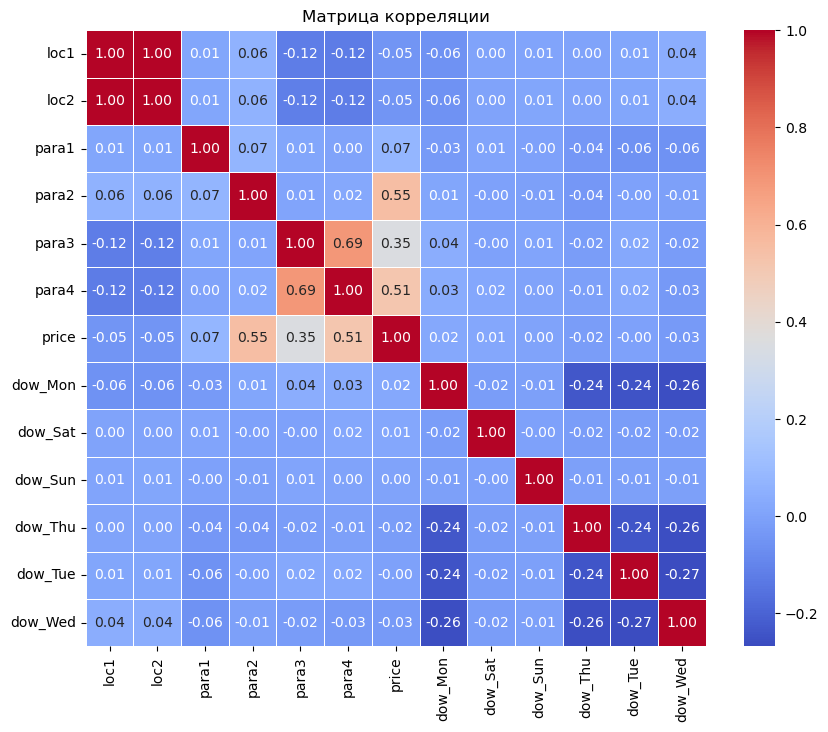

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

In [66]:
X = data.drop('price', axis=1)
y = data['price']

In [67]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
linear_reg = LinearRegression()

In [69]:
linear_reg.fit(X_tr, y_train)

LinearRegression()

In [70]:
y_prediction_linear = linear_reg.predict(X_test)

In [71]:
mse_linear = mean_squared_error(y_test, y_prediction_linear)
r2_linear = r2_score(y_test, y_prediction_linear)

In [73]:
print("Linear Regression Performance:")
print(mse_linear)
print(r2_linear)

Linear Regression Performance:
45249.7677938075
0.5336307984357858


In [124]:
rand_forest_reg = RandomForestRegressor(random_state=42)

In [125]:
rand_forest_reg.fit(X_tr, y_tr)

RandomForestRegressor(random_state=42)

In [126]:
y_pred_rand_forest = rand_forest_reg.predict(X_test)

In [127]:
mse_rand_forest = mean_squared_error(y_test, y_pred_rand_forest)
r2_rand_forest = r2_score(y_test, y_pred_rand_forest)

In [128]:
print("\nRandom Forest Regression Performance:")
print(mse_rand_forest)
print(r2_rand_forest)


Random Forest Regression Performance:
30374.907335916505
0.686939359636294


In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
params = {'n_estimators': [100, 150],
          'max_depth': [5,7,9],
          'max_features': [4,6,8],
         }

In [131]:
rf_search = GridSearchCV(estimator=rand_forest_reg, param_grid=params, scoring='neg_mean_squared_error', cv=3)

In [132]:
rf_search.fit(X_tr, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 7, 9], 'max_features': [4, 6, 8],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error')

In [133]:
prediction =rf_search.predict(X_test)

In [134]:
best_param=rf_search.best_params_

In [135]:
best_param

{'max_depth': 9, 'max_features': 6, 'n_estimators': 100}

In [136]:
best_rf_reg_estim=rf_search.best_estimator_

In [137]:
best_rf_reg_estim

RandomForestRegressor(max_depth=9, max_features=6, random_state=42)

In [138]:
best_rf_reg_estim.fit(X_tr, y_train)

RandomForestRegressor(max_depth=9, max_features=6, random_state=42)

In [139]:
y_pred_best_rf_reg_estim=best_rf_reg_estim.predict(X_test)

In [140]:
mse_best_rf_reg_estim = mean_squared_error(y_test, y_pred_best_rf_reg_estim)
r2_best_rf_reg_estim = r2_score(y_test, y_pred_best_rf_reg_estim)

In [141]:
print("Best Random Forest Regression Performance (according to best estim):")
print(mse_best_rf_reg_estim)
print(r2_best_rf_reg_estim)

Best Random Forest Regression Performance (according to best estim):
33204.231346380446
0.6577787772938779


In [142]:
feature_importances = best_rf_reg_estim.feature_importances_

In [143]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [144]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

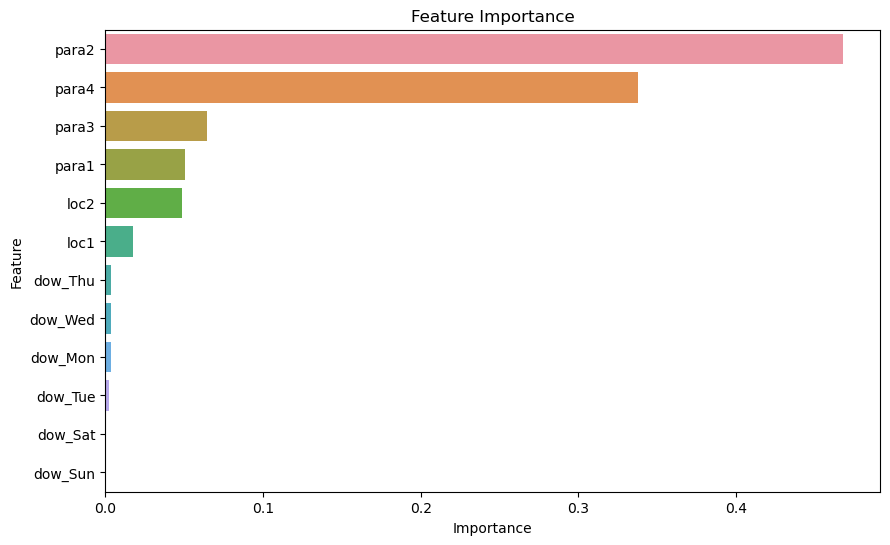

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
Я cначалa делала базовый анализа данных, узнавала есть ли  пропущенные данные. А когда не получилось 
работать с categorical данные, преобразовала их в numerical. 

Чтобы понять перформанс моделя машинного обучения использовала 
MSE и R2. 
Linear Regression Performance:
45249.7677938075
0.5336307984357858

Чтобы улучшить перформанс использовала модель случайного леса с гиперпараметрами 
(GridSearchCV). Затем  best_estimator_ показал какие именно гиперпараметры являются наилучшими.
С наилучшими параметрами прогнозировала данные и посчитала перформанс этой последней модели.
Модель случайного леса дала более точные значения MSE и R2 на тестовом наборе данных.

Best Random Forest Regression Performance (according to best estim):
33204.231346380446
0.6577787772938779.

Если сравнить модели, mse у последней модели на 12000 меньше чем mse линейной регрессий. 
Но r2 больше оказалось у первой модели, для этого мне кажется надо использовать 
случайно сгенерированные параметры, затем высчитать best_params_.